In [19]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Load Titanic dataset from seaborn
import seaborn as sns
df = sns.load_dataset('titanic')
# Preview the dataset
print("Original shape:", df.shape)
df.head()

Original shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
# A. Data Cleaning
# Drop rows with too many missing values (e.g., 'deck')

df.drop(columns=['deck'], inplace=True)
# Fill missing age values with median
df['age'].fillna(df['age'].median(), inplace=True)
# Fill missing embarked values with the most frequent value (mode)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# Drop rows with missing 'embark_town' (not essential)
df.drop(columns=['embark_town'], inplace=True)
# Drop other columns not useful for modeling
df.drop(columns=['alive', 'who', 'adult_male', 'alone', 'class'], inplace=True)
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)
# Re-check for missing data
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


/tmp/ipython-input-20-4007915700.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-20-4007915700.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [21]:
# B. Encoding Categorical Variables
# Initialize label encoder
le = LabelEncoder()
# Encode 'sex' and 'embarked'
df['sex'] = le.fit_transform(df['sex']) # male = 1, female = 0
df['embarked'] = le.fit_transform(df['embarked']) # C=0, Q=1, S=2
# Check cleaned data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [22]:
# C. Splitting the Dataset
# Define features (X) and target (y)
X = df.drop(columns=['survived']) # Features
y = df['survived'] # Target
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
# Show the final shape
print(f"\nTraining data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (620, 7), Testing data: (155, 7)


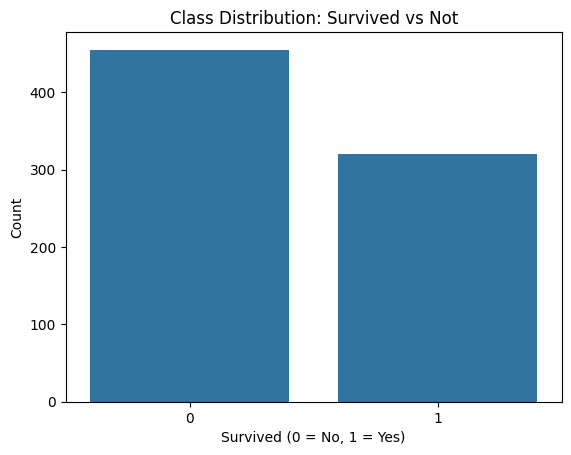

Survival Class Distribution (%):
 survived
0    58.709677
1    41.290323
Name: proportion, dtype: float64


In [23]:
# 2.1 Distribution of Target Classes
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='survived', data=df)
plt.title('Class Distribution: Survived vs Not')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
# Percentage distribution
class_counts = df['survived'].value_counts(normalize=True) * 100
print("Survival Class Distribution (%):\n", class_counts)

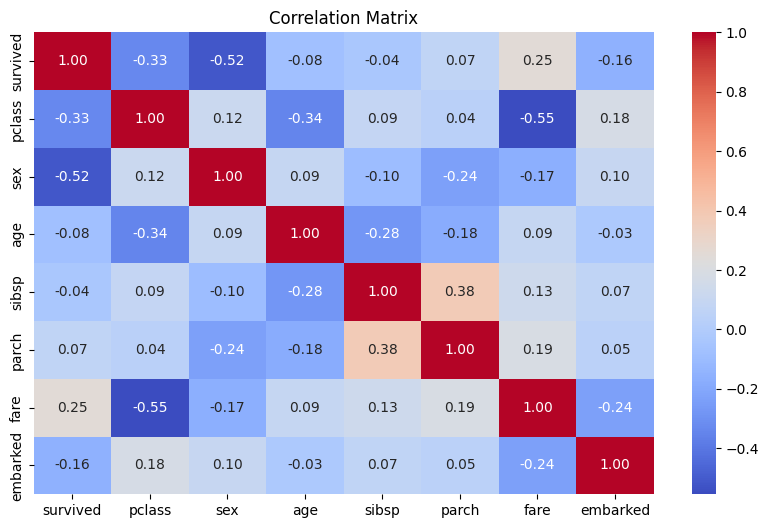

In [24]:
# 2.2 Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

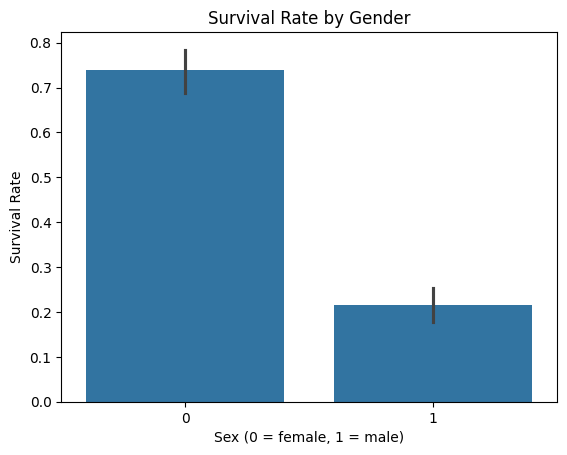

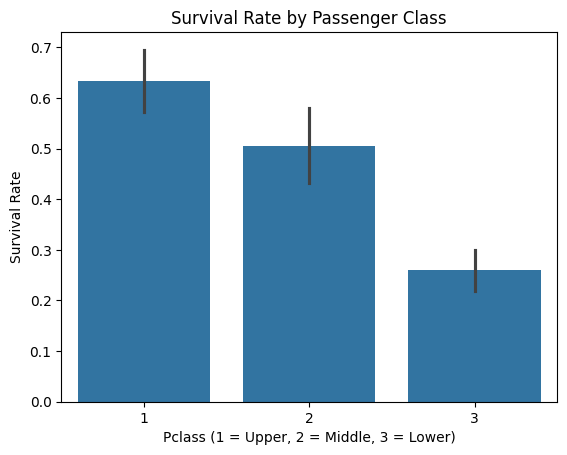

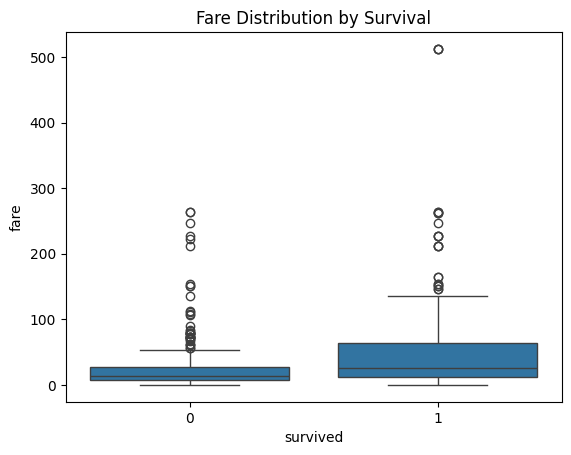

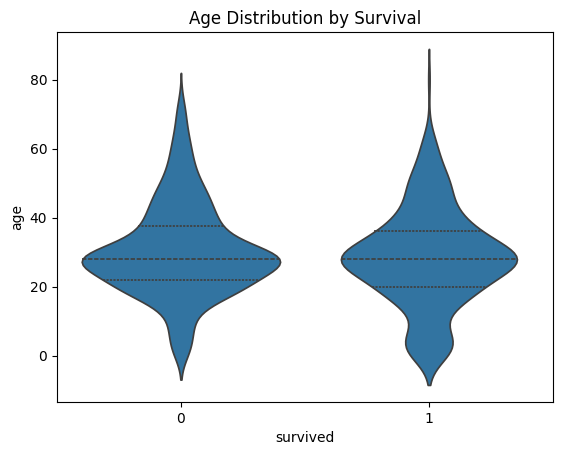

In [25]:
# 2.3 Feature-based Survival Analysis
# A. Survival by Sex
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Survival Rate')
plt.show()
# B. Survival by Passenger Class
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass (1 = Upper, 2 = Middle, 3 = Lower)')
plt.ylabel('Survival Rate')
plt.show()
# C. Fare distribution by survival
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()
# D. Age distribution by survival
sns.violinplot(x='survived', y='age', data=df, inner="quartile")
plt.title('Age Distribution by Survival')
plt.show()

In [27]:
# Import classifiers and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# Initialize models
log_reg = LogisticRegression(max_iter=500)
rf_clf = RandomForestClassifier(random_state=42)

# Dictionary for model comparison
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf
}

# Train and evaluate both models
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Needed for ROC-AUC

    # Evaluate
    print(f"\n{name} Evaluation:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall:", round(recall_score(y_test, y_pred), 4))
    print("F1 Score:", round(f1_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))



Logistic Regression Evaluation:
Accuracy: 0.7742
Precision: 0.7049
Recall: 0.7167
F1 Score: 0.7107
ROC-AUC: 0.8514

Random Forest Evaluation:
Accuracy: 0.7355
Precision: 0.6667
Recall: 0.6333
F1 Score: 0.6496
ROC-AUC: 0.8027



Confusion Matrix for Logistic Regression:


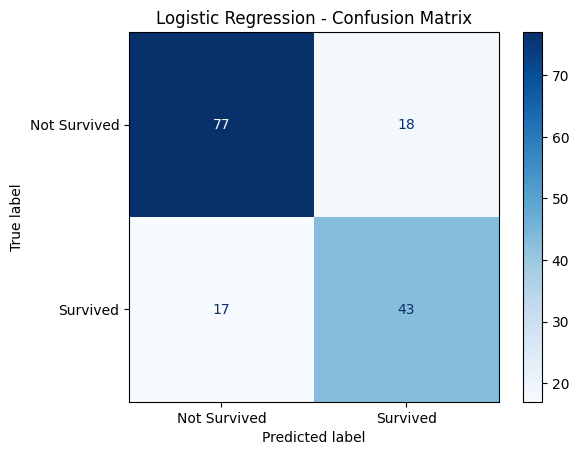


Confusion Matrix for Random Forest:


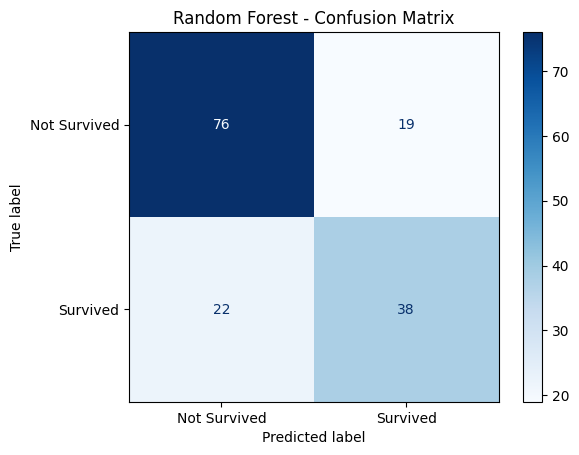

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrices for both models
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])

    print(f"\nConfusion Matrix for {name}:")
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()


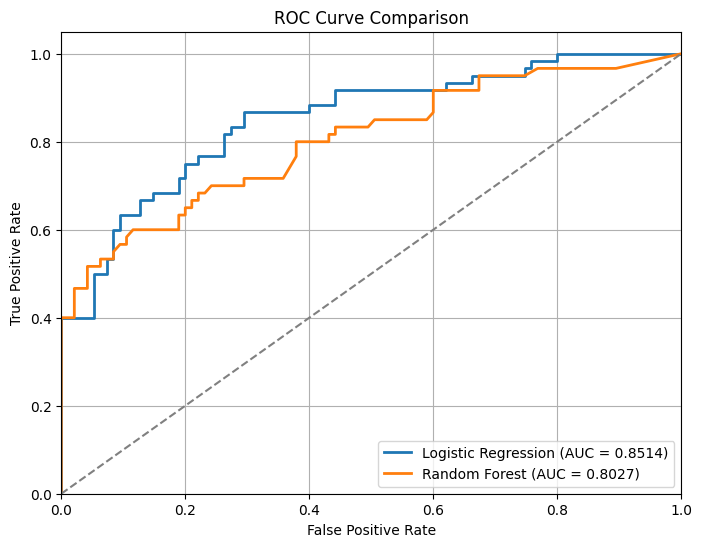

In [31]:
from sklearn.metrics import roc_curve, auc
# Plot ROC curve for both models
plt.figure(figsize=(8, 6))
for name, model in models.items():
  y_score = model.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')
# Plot baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [32]:
# Model Deployment Strategy
# 1. Model Serialization
# Save the trained model using serialization tools such as:
# joblib :
import joblib
joblib.dump(model, 'logistic_model.pkl')
# pickle (alternative)

['logistic_model.pkl']

In [34]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load trained model
model = joblib.load('logistic_model.pkl')

# Part 5: Deployment and Monitoring
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Ensure 'features' is provided
    if 'features' not in data:
        return jsonify({'error': 'Missing "features" in request'}), 400

    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)

    return jsonify({'prediction': int(prediction[0])})

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
